#Assignment 1 (Random Forest)

* In this project you are given a dataset of housing housing price prediction. 
Dataset description is found in the given datasets.

* The goal of the project is to predict the price of a house given its attributes. 
Therefore, the problem is a regression task. 

* You need to build a random forest that consists of multiple decision trees (for regression) from the given training data set. Then, apply it on the test set and submit your code to generate predictions.
You need to build the random forest and decision trees from scratch. (I.e., it is not allowed to use existing machine learning libraries or packages such as sklearn.)

* You may use any programming language/environment of your choice, but you are required to submit the complete source code to produce the output
If you use anything other than jupyter notebook, submit an executable and run that from the main function of the jupyter notebook so that the prediction generation is automated. We can provide assistance with this.
The output (a single file with the predictions for each test instance) must be generated automatically using the approach implemented by you. Submitting predictions/code from any other source (Internet, another student, etc.) is considered cheating and will result in immediate disqualification (i.e., dismissal from the course).

##Part 1: Preprocessing and dataset analysis (20 points)

* The given dataset is quite complex, it has many attributes, and not all of them are useful! 
Training on such dataset results in a bad accuracy. And this is exactly the point! 

* "Understanding the question is half the answer". In data mining, understanding the dataset is half the answer! 

* In part 1 you need to analyze the dataset and make it clean. 
 

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###Load the dataset and explore (5 points)

* Load the dataset, view the dataset and the shape of it, 

In [38]:
df_train = pd.read_csv("../1/files/housing_price_train.csv")
df_test = pd.read_csv("../1/files/housing_price_test.csv")

# df_train.info()
print(df_train.shape)

df_train.head(5)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Clean the dataset (10 points)

* We cannot train on a 'dirty' dataset! There are duplicated, Null, and missing values that you need to take care of!

* Drop all columns which have null values >= 70 % and drop all rows which have null values >= 70 %.

* You need to take care of categorial data!

In [39]:
def show_null_percentage(df):
    miss_val = pd.DataFrame(
        data=(df.isna().mean() * 100).round(2).sort_values(ascending=False),
        columns=["MissingValuePercentage"],
    )
    print(miss_val[miss_val["MissingValuePercentage"] > 0])

def drop_columns(df):
    min_count =  int(((100-70.0)/100)*df.shape[0] + 1)
    df.dropna(axis=1, thresh = min_count, inplace = True) 

def drop_rows(df):
    df.dropna(axis=0, thresh = len(df.columns) * 0.7, inplace = True)
    
    
def fill_missing_values(df):
    df['LotFrontage'].fillna(value = df['LotFrontage'].mean, inplace = True)
    df['GarageType'].fillna(value = df['GarageType'].mode()[0], inplace = True)
    
    miss_val = df.isnull().sum().sort_values(ascending = False)
    miss_val = pd.DataFrame(data = df.isnull().sum().sort_values(ascending = False), columns = ['MissingValueCount'])
    for col in list(miss_val.index):
        df[col].fillna(df[col].mode()[0], inplace = True)
        
    df.replace(['?','NA','NAN','none','','-','...','np'], "None", inplace = True)

    return df

def get_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns

def categorical_to_numeric(dataframe, column_name):
    # convert categorical data to numerical using pandas
    dataframe[column_name] = pd.Categorical(dataframe[column_name])
    dataframe[column_name] = dataframe[column_name].cat.codes
    return dataframe

def convert_cat_to_num(dataframe):
    # Get all categorical columns
    categoricalColumns = get_categorical_columns(dataframe)
    for col in categoricalColumns:
        categorical_to_numeric(dataframe, col)
    return dataframe
    
def PreprocessingData(df):
    """
        TODO
        Show NULL values for each columns in dataset and thier percentage
        Drop all columns which have null values >= 70 % 
        Drop all rows which have null values >= 70 %
        Fill all missing values with the (mean, mode)

    """
    
    show_null_percentage(df)
    
    #Check the dimension before dropping
    print(df.shape)
    
    drop_columns(df)
    drop_rows(df)
    
    #Check the dimension after dropping
    print(df.shape)
    
    fill_missing_values(df)
    #Check for missing values
    show_null_percentage(df)
    
    

PreprocessingData(df_train)
PreprocessingData(df_test)

df_train = convert_cat_to_num(df_train)
df_test = convert_cat_to_num(df_test)

print(df_train.dtypes.dtypes)

              MissingValuePercentage
PoolQC                         99.52
MiscFeature                    96.30
Alley                          93.77
Fence                          80.75
MasVnrType                     59.73
FireplaceQu                    47.26
LotFrontage                    17.74
GarageYrBlt                     5.55
GarageCond                      5.55
GarageType                      5.55
GarageFinish                    5.55
GarageQual                      5.55
BsmtFinType2                    2.60
BsmtExposure                    2.60
BsmtQual                        2.53
BsmtCond                        2.53
BsmtFinType1                    2.53
MasVnrArea                      0.55
Electrical                      0.07
(1460, 81)
(1460, 77)
Empty DataFrame
Columns: [MissingValuePercentage]
Index: []
              MissingValuePercentage
PoolQC                         99.81
MiscFeature                    96.47
Alley                          92.50
Fence                         

### Correlations! (5 points)

* Now we have a clean dataset, but not all attributes are useful! 

* Display the corrlation between all features and the sales price. This will show you which feature affects sales price more. You may use *corr()* function. 

* Choose the most correlated features, and remove others. 

ExterQual      -0.636884
BsmtQual       -0.618025
KitchenQual    -0.589189
GarageFinish   -0.537242
HeatingQC      -0.400178
                  ...   
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, Length: 77, dtype: float64


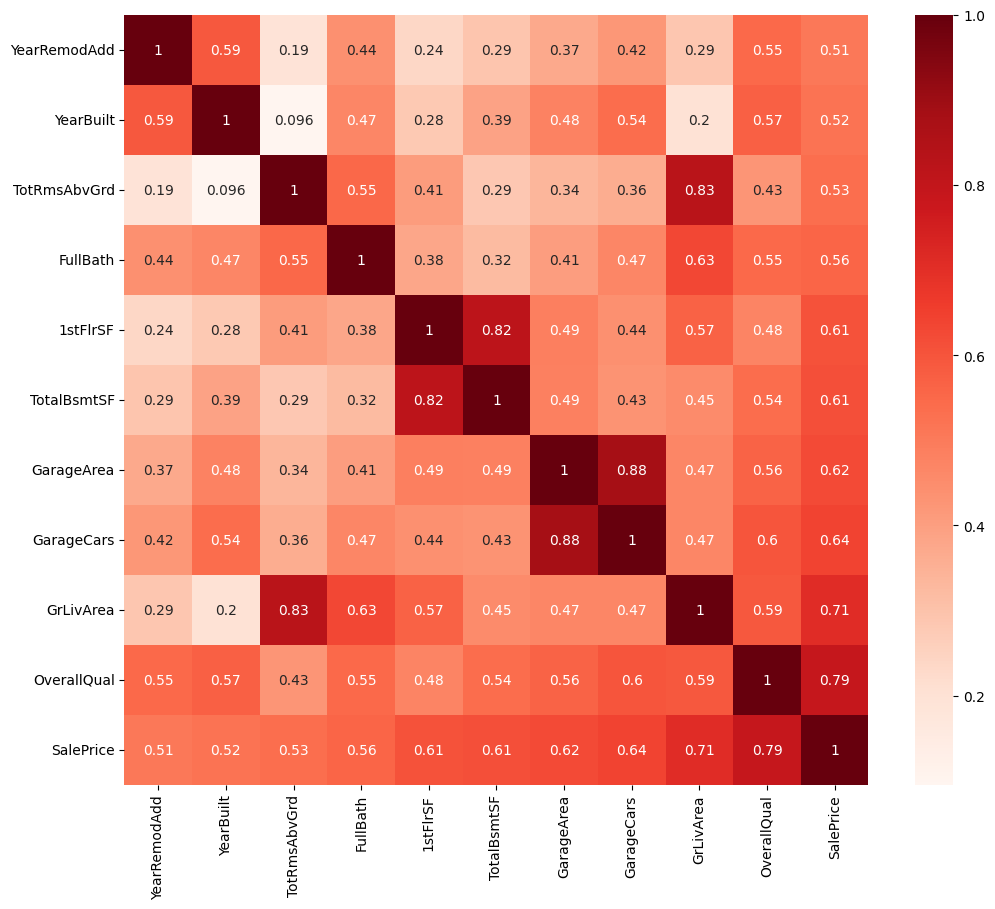

In [40]:
correlation = df_train[df_train.columns].corr()['SalePrice'][:].sort_values()
print(correlation)
# keep most correlated features (>50%) and remove others
most_correlated = correlation[correlation > 0.5]
df_train = df_train[most_correlated.index]

plt.figure(figsize=(12, 10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Part 2: Decision Tree (45 points)
#### Building a Decision Tree:
A Decision tree consists of nodes connected by edges. A decision tree is typically, a binary tree, which has the following properties:
- One node is marked as Root node
- Every node other than the root has a parent node
- Each node can have at most 2 child nodes (left edge & right edge)
- Leaf node is the node which contains pure data or when we reach to the maximum depth 

To create the decision tree model for scratch you need to create two classes (a class for the node, for example "class DecisionNode():" and a class for Decision Tree model, for example "class RegressionDecisionTree():")


1- DecisionNode class used to save some values for each node we do the spliting on it until we reach the leaf node
so we will save the following values for the node:
- feature: feature index.
- threshold: the value we used to split the data on.
- value: the average value for the leaf node.
- True_Branch: if the condition is true.
- False_Branch: if the condition is false.

In [41]:
class DecisionNode():
    def __init__(self, feature_idx=None, threshold=None, value=None, true_branch=None, false_branch=None):
        self.feature_idx = feature_idx # index of the feature that is used
        self.threshold = threshold     # threshold value for feature when making the decision
        self.value = value # Average value if the node is a leaf in the tree
        self.true_branch = true_branch # the node we go to if decision returns True
        self.false_branch = false_branch # the node we go to if decision returns False

# Decision Tree Class
This Class consists the following functions:
<ol>
<li> <b>build_tree</b>: used to create the decision tree nodes</li> 
<li> <b>calc_variance_reduction</b> : measure the impurity by using variance reduction measure (like MSE) </li> 
the function takes three parameters (parentRec: the records for the target before split,and the left and right records after splitting. This function used to measure the impurity for each node and decide if we will split or not.
<li> <b>majority_vote</b>: used to calculate values for the leaf nodes records which equal to the mean of these records.</li> 
<li><b>split_by_feature</b>: this function take the feature and the threshold and check if the feature is numerical so it split the records into two node (true which is the left edge and false which is the right edge)
if the feature is categorical so it split where the values equal to the threshold</li>
<li> <b>fit</b>: Used to train the dataset after spliting the data into two part x: features, y: target</li>
<li><b>predict_value</b>: used to predict the value for each record, it is a recursive method to find the leaf node that corresponds to prediction
<li><b>predict</b>: take all records for the test data and iterate into each record to predit the y(target) value and save the result into a prediction list. 

In [42]:
class RegressionDecisionTree():
    def __init__(self, min_VarianceReduction=1e-7, max_depth=5):
        self.root = None  # root of this tree
        self.min_VarianceReduction = min_VarianceReduction # minimum VarianceReduction to allow splitting
        # used to stopping conductions
        self.max_depth = max_depth  # maximum depth the tree grows to

    def build_tree(self, X, y, current_depth=0):
        # we will use decision dictionary to save the feature and the threshold we build the tree on
        decision = None
        # we will use subtrees dictionary to save the feature and the threshold we build the tree on
        subtrees = None
        largest_variance_Reduction = 0
        # add y as last column of X
        df = pd.concat((X, y), axis=1)
        n_rows, n_features = X.shape
        if current_depth <= self.max_depth:
            # iterate through every feature
            for feature_idx in range(n_features):
                # values of that column
                feature_values = X.iloc[:, feature_idx]                
                unique_values = feature_values.unique()                
                for threshold in unique_values:
                    X_trueEdge, X_falseEdge = self.split_by_feature(df, feature_idx, threshold)
                    if len(X_trueEdge) > 0 and len(X_falseEdge) > 0:
                        y_true = X_trueEdge.iloc[:,-1]
                        y_false = X_falseEdge.iloc[:,-1]   
                        # Calculate impurity
                        VarianceRed = self.Calc_variance_reduction(y, y_true, y_false)
                        # Keep track of which feature gave the largest information gain
                        if VarianceRed > largest_variance_Reduction:
                            largest_variance_Reduction = VarianceRed
                            decision = {"feature_idx":feature_idx, "threshold":threshold}
                            subtrees = {"X_true":X_trueEdge.iloc[:,:-1],
                                        "y_true":y_true,
                                        "X_false":X_falseEdge.iloc[:,:-1],
                                        "y_false":y_false}

        # we will construct new branch of tree if the variance_Reduction is larger than minimum variance_Reduction that we've defined
        if largest_variance_Reduction > self.min_VarianceReduction:
            true_branch = self.build_tree(subtrees["X_true"], subtrees["y_true"], current_depth+1)
            false_branch = self.build_tree(subtrees["X_false"], subtrees["y_false"], current_depth+1)
            return DecisionNode(feature_idx=decision["feature_idx"], threshold=decision["threshold"], true_branch=true_branch, false_branch=false_branch)

        # at leaf node we calculate the mean for the records
        leaf_value = self.majority_vote(y)
        return DecisionNode(value=leaf_value)


    def Calc_variance_reduction(self, parentRec, left_edgeRec, Right_edgeRec):
        # Calculate the weighted variance for both child nodes (left and right) after a split

        # Calculate the proportion of samples in the left child node
        weight_l = len(left_edgeRec) / len(parentRec)

        # Calculate the proportion of samples in the right child node
        weight_r = len(Right_edgeRec) / len(parentRec)

        # Calculate the variance reduction as the difference between the variance of the parent node
        # and the weighted sum of the variances of the two child nodes.
        # This measures how much the split reduces the variance (impurity) in the data.
        # A higher variance reduction indicates a better split.
        variance_reduction = np.var(parentRec) - (weight_l * np.var(left_edgeRec) + weight_r * np.var(Right_edgeRec))

        # Return the calculated variance reduction
        return variance_reduction

    def majority_vote(self, Y):
        # Calculate the mean value of the target variable Y

        # This function is used in the context of a regression decision tree
        # where the 'majority vote' is actually the mean of the target values in the leaf node.
        # When the decision tree algorithm determines that no further splitting is beneficial,
        # it creates a leaf node. The predicted value for this leaf node is the mean
        # of the target values (Y) of the samples that fall into this node.

        # This mean value is used as the prediction for all instances that reach this leaf node.
        return np.mean(Y)

    def split_by_feature(self, db, feature_idx, threshold):
        # Split the dataset 'db' based on a specified feature and threshold value.

        # If the feature is categorical (dtype == "object"):
        # - 'left_edge' contains all rows where the feature value equals the threshold
        # - 'right_edge' contains all rows where the feature value does not equal the threshold
        if db.iloc[:, feature_idx].dtype == "object":
            left_edge = db[db.iloc[:, feature_idx] == threshold]
            right_edge = db[db.iloc[:, feature_idx] != threshold]
        # If the feature is numerical:
        # - 'left_edge' contains all rows where the feature value is less than or equal to the threshold
        # - 'right_edge' contains all rows where the feature value is greater than the threshold
        else:
            left_edge = db[db.iloc[:, feature_idx] <= threshold]
            right_edge = db[db.iloc[:, feature_idx] > threshold]

        # Return the two subsets of the dataset after the split
        return left_edge, right_edge

    def fit(self, X, y):
        self.root = self.build_tree(X, y)

    def predict_value(self, xTest, tree=None):
        # Recursively traverse the decision tree to predict the value for a given test instance 'xTest'.

        # If 'tree' is None, start from the root of the tree
        if tree is None:
            tree = self.root

        # If the current node is a leaf node (has a value), return this value as the prediction
        if tree.value is not None:
            return tree.value

        # Determine the feature value of the test instance at the current node's feature index
        feature_val = xTest[tree.feature_idx]

        # Decide which branch (true_branch or false_branch) to follow based on the feature value
        # and the threshold at the current node. If feature_val is less than or equal to the threshold,
        # follow the true_branch; otherwise, follow the false_branch.
        branch = tree.true_branch if feature_val <= tree.threshold else tree.false_branch

        # Continue traversing the tree recursively along the chosen branch
        return self.predict_value(xTest, branch)

    def predict(self, XTest):
        y_pred = [self.predict_value(row) for row in XTest.values]
        return y_pred

- To Check the Accuracy for our prediction we use CalcAccuracy function which take the actual values for the test dataset and the predicted values and apply the RMSE formula.

In [43]:
def CalcAccuracy(Actual_Y, Predicted_y):
    # If Actual_Y is a DataFrame, extract the last column
    if isinstance(Actual_Y, pd.DataFrame):
        Actual_Y = Actual_Y.iloc[:, -1]

    # Calculate Mean Squared Error and Root Mean Squared Error
    mse = np.mean((np.array(Actual_Y) - np.array(Predicted_y)) ** 2)
    rmse = np.sqrt(mse)
    return rmse

- Build decision tree model
- Fit the model
- Predict the values from test data 

In [44]:
from sklearn.model_selection import train_test_split

# Splitting the original training data
X_train, X_test, Y_train, Y_test = train_test_split(
    df_train.iloc[:, :-1], df_train.iloc[:, -1], test_size=0.2, random_state=30
)

# Create the decision tree regressor
regressor = RegressionDecisionTree(min_VarianceReduction=1e-7, max_depth=5)

# Fit the model using the training part of the split
regressor.fit(X_train, Y_train)

# Predict using the test part of the split
predicted_y = regressor.predict(X_test)

# Calculate accuracy using the actual and predicted values of the test set
accuracy = CalcAccuracy(Y_test, predicted_y)
print("RMSE:", accuracy)

RMSE: 36945.2089396043


## Part 3: Random Forest (20 points)
#### Random forest class
- the Class consist of the following functions:
<ul>
    <li>Constructor: consists of the subset data (Training & Testing) dataset after preprocessing and a list of deciceion tree objects </li>    
    <li>Subsampling: Bagging we will take random sample with replacement for the Training dataset </li>
    <li>build_model: first make subsample for the training dataset, then split the data into featurespart(X) and targetpart(Y), then take 10 samples of the feature part, finally build the decision tree (fit), this function take the number of DT that we want to build</li>
    <li>predict: take the test dataset and make the prediction for the target field in all the tree in the random forest then take the mean for the prediction in each tree, finally add the mean of prediction to a list of predition </li>

</ul>

In [45]:
class RF(object):
    def __init__(self):
        self.Traindata = None  # Training data set (loaded into memory)
        self.Testdata = None  # Test data set for prediction
        self.trees = []  # List of decision trees

    # This function generates a subsample with replacement
    def __subsampling(self, train_set, sample_size_ratio):
        sample_number = round(len(train_set) * sample_size_ratio)
        return train_set.sample(n=sample_number, replace=True)

    def build_model(self, train_set, sample_size_ratio, number_of_trees):
        for i in range(number_of_trees):
            # Generate a training sample using subsampling
            TrainingSample = self.__subsampling(train_set, sample_size_ratio)

            # Create a new decision tree
            tree = RegressionDecisionTree()

            # Train the tree on the subsample
            tree.fit(TrainingSample.iloc[:, :-1], TrainingSample.iloc[:, -1])

            # Add the trained tree to the list of trees
            self.trees.append(tree)

    def predict(self, test_set):
        # List to store predictions from each tree
        all_predictions = []

        # For each tree in the forest, predict and store the results
        for tree in self.trees:
            predictions = tree.predict(test_set)
            all_predictions.append(predictions)

        # Calculate the mean of predictions from all trees for each test instance
        # Transpose the list of predictions to get predictions from all trees for each instance
        # Then compute the mean across trees for each instance
        mean_predictions = np.mean(np.transpose(all_predictions), axis=1)

        return mean_predictions

### Create Random Forest

* Create 10 Decision Tree in the randomforest
* Train the random forest with the dataset
* Use the created random forest to predict the test dataset 

In [46]:
# Assuming your training and testing datasets are named 'df_train' and 'df_test'

# Step 1: Create an instance of the Random Forest class
random_forest = RF()

# Step 2: Build the Random Forest model with 10 Decision Trees
# Here, you need to specify the sample size ratio. For example, 0.7 means each tree will be trained on 70% of the data
sample_size_ratio = 0.7  # This can be adjusted
number_of_trees = 10
random_forest.build_model(df_train, sample_size_ratio, number_of_trees)

# Step 3: Use the created Random Forest to predict on the test dataset
# Ensure that your test dataset (df_test) is properly formatted and ready for prediction
predicted_values = random_forest.predict(df_test.iloc[:, :-1])

# 'predicted_values' now contains the predictions for the test dataset

##Part4: Comparison! (15 points)

Now that you have finished implementing your Random Forest, it's time for some experiments and analysis! 

* Use the Random Forest in the scikit-learn library and train it on the same dataset. 

* Compare the accuracy given by your Random Forest to the scikit-learn one. 

* Increase the number of trees in your Random Forest. Does it improve the accuracy? 

* Make a table for comparing your Random Forest accuracy with different number of trees with the scikit-learn one. What is your conclusion? 

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

train_columns = set(df_train.columns[:-1])  # Exclude target variable
test_columns = set(df_test.columns)

missing_in_test = train_columns - test_columns
extra_in_test = test_columns - train_columns

# List of columns to keep in df_test (align with df_train)
columns_to_keep = df_train.columns[:-1]  # Excluding the target variable from df_train

# Align df_test to have the same columns as df_train
df_test_aligned = df_test[columns_to_keep]

# Recheck the alignment (optional)
assert df_train.columns[:-1].equals(
    df_test_aligned.columns
), "Columns do not match"

# Create and train the scikit-learn Random Forest model
sklearn_rf = RandomForestRegressor(n_estimators=10, random_state=42)
sklearn_rf.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])


# Make predictions and calculate RMSE for scikit-learn model
sklearn_predictions = sklearn_rf.predict(df_test_aligned)
sklearn_rmse = np.sqrt(
    mean_squared_error(df_test_aligned.iloc[:, -1], sklearn_predictions)
)

# Different numbers of trees to test
tree_counts = [10, 20, 30, 40, 50]
custom_rf_rmses = []

for count in tree_counts:
    custom_rf = RF()
    custom_rf.build_model(df_train, sample_size_ratio, count)
    custom_predictions = custom_rf.predict(df_test_aligned.iloc[:, :-1])
    custom_rmse = np.sqrt(
        mean_squared_error(df_test_aligned.iloc[:, -1], custom_predictions)
    )
    custom_rf_rmses.append(custom_rmse)

# Comparison data
comparison_data = {
    "Number of Trees": tree_counts,
    "Custom RF RMSE": custom_rf_rmses,
    "Sklearn RF RMSE": [sklearn_rmse] * len(tree_counts),
}

# Creating the comparison table
comparison_table = pd.DataFrame(comparison_data)

# Display the comparison table
comparison_table

IndexError: index 9 is out of bounds for axis 0 with size 9

In [30]:
# Check for the same columns in train and test sets
assert df_train.columns[:-1].equals(df_test.columns), "Columns do not match"

# Check for missing values in the test set
assert not df_test.isnull().values.any(), "Missing values in test set"

# Check data types
assert df_train.dtypes[:-1].equals(df_test.dtypes), "Data types do not match"

# If all checks pass, proceed with prediction
sklearn_predictions = sklearn_rf.predict(df_test)

AssertionError: Columns do not match

In [29]:
train_columns = set(df_train.columns[:-1])  # Exclude target variable
test_columns = set(df_test.columns)

missing_in_test = train_columns - test_columns
extra_in_test = test_columns - train_columns

# List of columns to keep in df_test (align with df_train)
columns_to_keep = df_train.columns[:-1]  # Excluding the target variable from df_train

# Align df_test to have the same columns as df_train
df_test_aligned = df_test[columns_to_keep]

# Recheck the alignment (optional)
assert df_train.columns[:-1].equals(
    df_test_aligned.columns
), "Columns still do not match"

# Prediction with aligned test dataset
sklearn_predictions = sklearn_rf.predict(df_test_aligned)